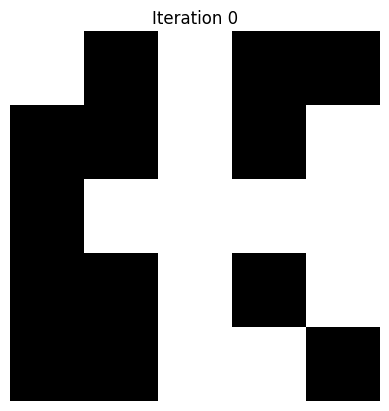

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

class HopfieldNetwork:
    def __init__(self, n_neurons):
        self.n_neurons = n_neurons
        self.weights = np.zeros((n_neurons, n_neurons))
        
    def train(self, patterns):
        # Train using Hebbian learning
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)  # No self-connections
        self.weights /= self.n_neurons
        
    def run(self, input_pattern, steps=10):
        pattern = input_pattern.copy()
        evolution = [pattern.copy()]
        for _ in range(steps):
            for i in range(self.n_neurons):
                net_input = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if net_input >= 0 else -1
            evolution.append(pattern.copy())
        return evolution

def display_pattern(ax, pattern, title=""):
    ax.clear()
    ax.imshow(pattern.reshape(5, 5), cmap='binary')  # Adjust the colormap as needed
    ax.set_title(title)
    ax.axis('off')  # Hide the axes for better visualization

# Define the 5x5 plus sign pattern (+1 and -1 representation)
plus_sign = np.array([
    1,  1, -1,  1,  1,
    1,  1, -1,  1,  1,
   -1, -1, -1, -1, -1,
    1,  1, -1,  1,  1,
    1,  1, -1,  1,  1
])

# Create a noisy version of the plus sign
noisy_plus_sign = plus_sign.copy()
noisy_indices = np.random.choice(len(plus_sign), size=5, replace=False)
noisy_plus_sign[noisy_indices] *= -1  # Flip 5 random bits

# Initialize Hopfield Network
hopfield_net = HopfieldNetwork(n_neurons=25)

# Train the Hopfield network on the original plus sign pattern
hopfield_net.train([plus_sign])

# Run the network starting from the noisy pattern
evolution = hopfield_net.run(noisy_plus_sign, steps=10)

# Set up the figure and axis for the animation
fig, ax = plt.subplots()

def update(frame):
    pattern = evolution[frame]
    display_pattern(ax, pattern, title=f"Iteration {frame}")

ani = animation.FuncAnimation(fig, update, frames=len(evolution), interval=500, repeat=False)

# Use HTML to display the animation inline
HTML(ani.to_jshtml())


In [7]:
plus_sign.reshape(5, 5)[5//2, :]

array([-1, -1, -1, -1, -1])